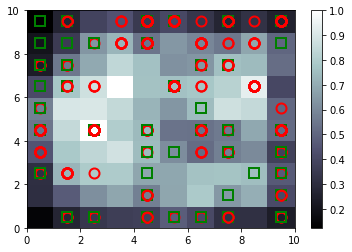

In [6]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset =  pd.read_csv("..\Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone() #gives you a white map
pcolor(som.distance_map().T) #assigning colors to mean interneuron distances
colorbar()
markers = ['o', 's'] #circle and square
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, # because we want to keep the marker at center of the box
         w[1] + 0.5,
         markers[y[i]], # to correspond squares with approved and circle with not approved
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

# Finding the frauds
mappings = som.win_map(X) # gets the mapping of all blocks on the SOM in the form of block coordinates and the people associated with it
frauds = np.concatenate((mappings[(3,6)], mappings[(2,4)]), axis = 0) # this is hardcoding, and will differ in each case to get the number of potential frauds 
frauds = sc.inverse_transform(frauds)